In [ ]:
# To install the gsdmm package
!pip install git+https://github.com/rwalk/gsdmm.git

  Cloning https://github.com/rwalk/gsdmm.git to /tmp/pip-req-build-sy4cctyh
  Running command git clone --filter=blob:none --quiet https://github.com/rwalk/gsdmm.git /tmp/pip-req-build-sy4cctyh
  Resolved https://github.com/rwalk/gsdmm.git to commit 4ad1b6b6976743681ee4976b4573463d359214ee
  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
import re
import string
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
# from sklearn.feature_extraction import stop_words

# from .mgp import MovieGroupProcess
from gsdmm import MovieGroupProcess

from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_notebook

In [ ]:
##Enter your csv path here
path="/content/drive/MyDrive/tweets_cleaned_13_04_23.csv"
df=pd.read_csv('/content/tweets_cleaned_13_04_23.csv')

In [ ]:
import nltk
from nltk.stem import *
nltk.download('punkt') # For Stemming
nltk.download('wordnet') # For Lemmatization
nltk.download('stopwords') # For Stopword Removal
nltk.download('omw-1.4')

#---------------------------------------
#to preprocess all the tweets and add it to the corpus, returns a corpus(list of list)
stop_words = set(stopwords.words('english'))
def text_preprocessing(df):
    corpus=[]

    lem = WordNetLemmatizer() # For Lemmatization
    for i in df['Tweet']:
        words=[w for w in nltk.tokenize.word_tokenize(i) if (w not in stop_words)] # word_tokenize function tokenizes text on each word by default
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        corpus.append(words)
    return corpus

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
corpus=text_preprocessing(df)
print(f"length of corpus : {len(corpus)}\n type of corpus :{type(corpus)}")
#17639 tweets

length of corpus : 17639
 type of corpus :<class 'list'>


In [ ]:
np.random.seed(0)

In [ ]:
#fitting the corpus on MOvuegroup process
mgp = MovieGroupProcess(K=4, alpha=0.01, beta=0.01, n_iters=30,)

# vocab = set(x for review in reviews_lemmatized for x in review)
n_terms = len(corpus)
model = mgp.fit(corpus, n_terms)

In stage 0: transferred 11059 clusters with 4 clusters populated
In stage 1: transferred 6329 clusters with 4 clusters populated
In stage 2: transferred 4096 clusters with 4 clusters populated
In stage 3: transferred 2261 clusters with 4 clusters populated
In stage 4: transferred 1121 clusters with 4 clusters populated
In stage 5: transferred 697 clusters with 4 clusters populated
In stage 6: transferred 493 clusters with 4 clusters populated
In stage 7: transferred 436 clusters with 4 clusters populated
In stage 8: transferred 397 clusters with 4 clusters populated
In stage 9: transferred 359 clusters with 4 clusters populated
In stage 10: transferred 382 clusters with 4 clusters populated
In stage 11: transferred 379 clusters with 4 clusters populated
In stage 12: transferred 360 clusters with 4 clusters populated
In stage 13: transferred 392 clusters with 4 clusters populated
In stage 14: transferred 402 clusters with 4 clusters populated
In stage 15: transferred 371 clusters with 4

In [ ]:
# print number of documents per topic
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)

# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-15:][::-1]
print('Most important clusters (by number of docs inside):', top_index)

# define function to get top words per topic
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts = sorted(cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster, sort_dicts))

# get top words in topics
top_words(mgp.cluster_word_distribution, top_index, 50)

Number of documents per topic : [2302 5477 4781 5079]
Most important clusters (by number of docs inside): [1 3 2 0]

Cluster 1 : [('politics', 4916), ('amp', 712), ('news', 667), ('sport', 647), ('football', 630), ('election', 426), ('bjp', 414), ('people', 374), ('vote', 369), ('party', 360), ('say', 355), ('health', 354), ('congress', 351), ('new', 343), ('break', 328), ('usa', 308), ('think', 302), ('get', 301), ('political', 297), ('today', 283), ('baseball', 264), ('government', 260), ('one', 259), ('make', 243), ('trend', 238), ('year', 228), ('right', 218), ('would', 216), ('take', 213), ('day', 212), ('time', 212), ('market', 205), ('minister', 203), ('entertainment', 202), ('breakingnews', 202), ('read', 199), ('trump', 197), ('leader', 196), ('india', 195), ('hockey', 195), ('work', 192), ('stock', 189), ('need', 189), ('tennis', 188), ('live', 187), ('newsbreak', 186), ('state', 179), ('like', 178), ('want', 178), ('president', 169)]

Cluster 3 : [('technology', 4384), ('amp

In [ ]:
# Import wordcloud library
from wordcloud import WordCloud

# Get topic word distributions from gsdmm model
cluster_word_distribution = mgp.cluster_word_distribution
cluster_word_distribution

In [ ]:
# Import wordcloud library
from wordcloud import WordCloud

# Get topic word distributions from gsdmm model
cluster_word_distribution = mgp.cluster_word_distribution
values=50
dic0={}
dic1={}
dic2={}
dic3 = {}

    # Select topic you want to output as dictionary (using topic_number)
topic_dict = sorted(cluster_word_distribution[0].items(), key=lambda k: k[1], reverse=True)[:values]
for i in topic_dict:
  dic0[i[0]] = i[1]

topic_dict = sorted(cluster_word_distribution[1].items(), key=lambda k: k[1], reverse=True)[:values]
for i in topic_dict:
  dic1[i[0]] = i[1]

topic_dict = sorted(cluster_word_distribution[2].items(), key=lambda k: k[1], reverse=True)[:values]
for i in topic_dict:
  dic2[i[0]] = i[1]

topic_dict = sorted(cluster_word_distribution[3].items(), key=lambda k: k[1], reverse=True)[:values]

for i in topic_dict:
  dic3[i[0]] = i[1]
#Dictionary of different clusters
# dic0,dic1,dic2,dic3



['ipl', 'cricket', 'sport', 'match', 'win', 'tataipl', 'kkr', 'health', 'live', 'rcb']


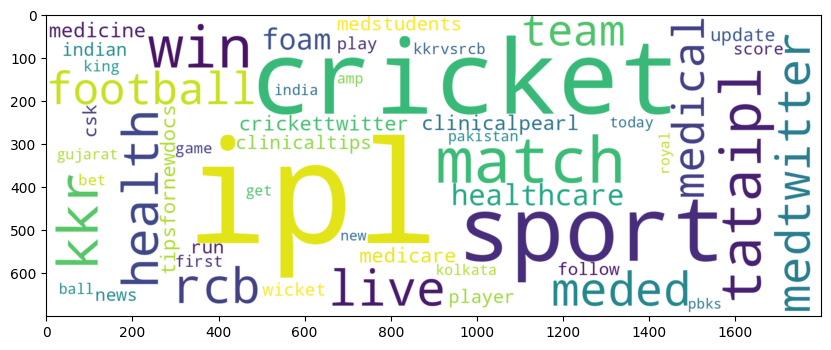

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',
                            width=1800,
                            height=700,
                            # font_path=path_to_font,
                            ).generate_from_frequencies(dic0)

# Print to screen
fig, ax = plt.subplots(figsize=[10,10])

# Get the word frequencies from the word cloud image
word_frequencies = Counter(wordcloud.words_)

# Set the number of top words you want to extract
num_top_words = 10

# Extract the most frequent words
c0_pred_list =[]
for i in range(10):
  c0_pred_list.append(word_frequencies.most_common(num_top_words)[i][0])
print(c0_pred_list)
#generate the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')

['politics', 'amp', 'news', 'sport', 'football', 'election', 'bjp', 'people', 'vote', 'party']


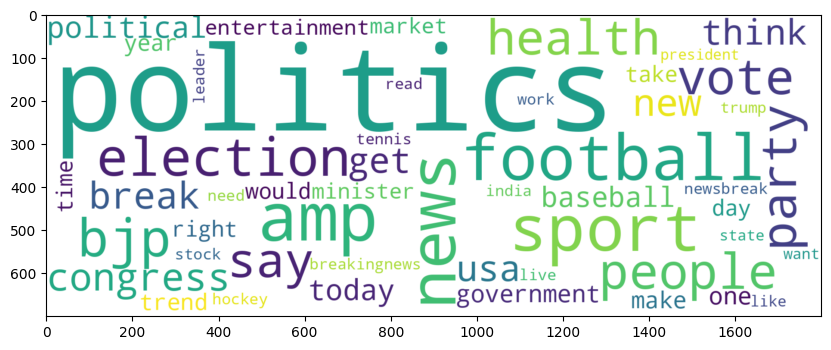

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',
                            width=1800,
                            height=700,
                            # font_path=path_to_font,
                            ).generate_from_frequencies(dic1)

# Print to screen
fig, ax = plt.subplots(figsize=[10,10])

# Get the word frequencies from the word cloud image
word_frequencies = Counter(wordcloud.words_)

# Set the number of top words you want to extract
num_top_words = 10

# Extract the most frequent words
c1_pred_list =[]
for i in range(10):
  c1_pred_list.append(word_frequencies.most_common(num_top_words)[i][0])
print(c1_pred_list)
#generate the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')

['health', 'football', 'sport', 'amp', 'mentalhealth', 'mental', 'day', 'year', 'life', 'get']


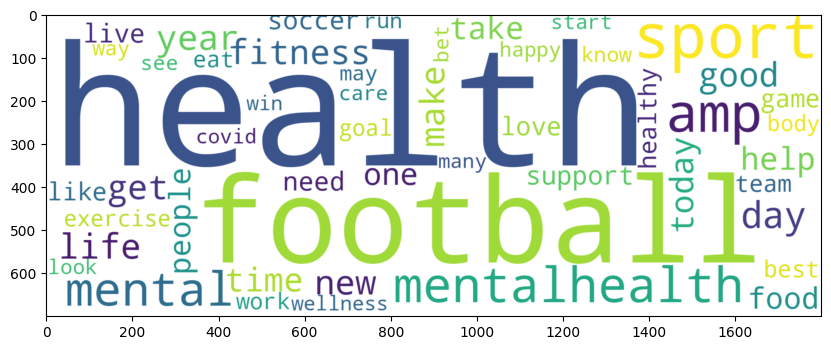

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',
                            width=1800,
                            height=700,
                            # font_path=path_to_font,
                            ).generate_from_frequencies(dic2)

# Print to screen
fig, ax = plt.subplots(figsize=[10,10])

# Get the word frequencies from the word cloud image
word_frequencies = Counter(wordcloud.words_)

# Set the number of top words you want to extract
num_top_words = 10

# Extract the most frequent words
c2_pred_list =[]
for i in range(10):
  c2_pred_list.append(word_frequencies.most_common(num_top_words)[i][0])
print(c2_pred_list)
#generate the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')

['technology', 'amp', 'health', 'innovation', 'blockchain', 'tech', 'new', 'use', 'web', 'future']


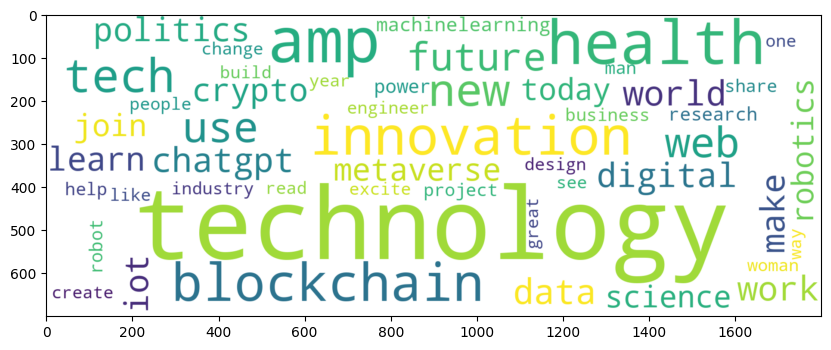

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',
                            width=1800,
                            height=700,
                            # font_path=path_to_font,
                            ).generate_from_frequencies(dic3)

# Print to screen
fig, ax = plt.subplots(figsize=[10,10])
# Get the word frequencies from the word cloud image
word_frequencies = Counter(wordcloud.words_)

# Set the number of top words you want to extract
num_top_words = 10

# Extract the most frequent words
c3_pred_list =[]
for i in range(10):
  c3_pred_list.append(word_frequencies.most_common(num_top_words)[i][0])
print(c3_pred_list)
#generate the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')

In [ ]:
def score_calc(pred_list):
  # Dictionary with categories and lists of top words in the category
  word_lists = {'health': ['health',
    'amp',
    'mentalhealth',
    'mental',
    'new',
    'life',
    'healthcare',
    'fitness',
    'get',
    'good'],
  'sports': ['sport',
    'ipl',
    'football',
    'cricket',
    'news',
    'match',
    'win',
    'vs',
    'game',
    'team'],
  'tech': ['technology',
    'ai',
    'blockchain',
    'innovation',
    'amp',
    'tech',
    'new',
    'web',
    'use',
    'future'],
  'politics': ['politics',
    'amp',
    'bjp',
    'vote',
    'people',
    'party',
    'congress',
    'say',
    'new',
    'news']}

  # List of words to compare with the dictionary
  word_list_to_compare = pred_list

  def jaccard_similarity(list1, list2):
      set1 = set(list1)
      set2 = set(list2)
      intersection = len(set1.intersection(set2))
      union = len(set1.union(set2))
      similarity = intersection / union
      return similarity

  # Calculate similarity between the word list and each category in the dictionary
  similarity_scores = {}
  for category, words in word_lists.items():
      # category_doc = nlp(" ".join(words))
      # word_list_doc = nlp(" ".join(word_list_to_compare))
      similarity_scores[category] = jaccard_similarity(word_list_to_compare, words)

  # Print the similarity scores
  for category, similarity_score in similarity_scores.items():
      print(f"Similarity with '{category}': {similarity_score:.4f}")


In [ ]:
#To name the cluster, clusetr 3 has most similarity with tech so it goes to tech topic, like wise check for other clusters
score_calc(c3_pred_list)

Similarity with 'health': 0.1765
Similarity with 'sports': 0.0000
Similarity with 'tech': 0.8182
Similarity with 'politics': 0.1111


In [ ]:
#calculation of coherence score
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

topics=[]

# top_40_wrods_topic_0=top_40_wrods_topic_0
# top_40_wrods_topic_1=top_40_wrods_topic_1
# # top_40_wrods_topic_2=top_40_wrods_topic_2

topics.append(c0_pred_list)
topics.append(c1_pred_list)
topics.append(c2_pred_list)
topics.append(c3_pred_list)
print(topics)

# Creating a dictionary with the vocabulary
word2id = Dictionary( corpus )

# Coherence model
cm = CoherenceModel(topics=topics,
                    texts=corpus,
                    coherence='c_v',
                    dictionary=word2id)

coherence_per_topic = cm.get_coherence_per_topic()
coherence = cm.get_coherence()
print(coherence)

[['ipl', 'cricket', 'sport', 'match', 'win', 'tataipl', 'kkr', 'health', 'live', 'rcb'], ['politics', 'amp', 'news', 'sport', 'football', 'election', 'bjp', 'people', 'vote', 'party'], ['health', 'football', 'sport', 'amp', 'mentalhealth', 'mental', 'day', 'year', 'life', 'get'], ['technology', 'amp', 'health', 'innovation', 'blockchain', 'tech', 'new', 'use', 'web', 'future']]
0.4867357668789258


In [ ]:
X = df.drop(columns = 'Hashtag')
y = df['Hashtag']

# Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tweets_y = le.fit_transform(y)

In [ ]:
# Label Mapping
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'health': 0, 'politics': 1, 'sports': 2, 'tech': 3}

In [ ]:
# Spliting Data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, tweets_y, test_size=0.30, random_state=0)

In [ ]:
# Dictionary of clusters we made
dictionary = {'sports' : c0_pred_list, 'politics' : c1_pred_list, 'health' : c2_pred_list, 'tech' : c3_pred_list}
dictionary

{'sports': ['ipl',
  'cricket',
  'sport',
  'match',
  'win',
  'tataipl',
  'kkr',
  'health',
  'live',
  'rcb'],
 'politics': ['politics',
  'amp',
  'news',
  'sport',
  'football',
  'election',
  'bjp',
  'people',
  'vote',
  'party'],
 'health': ['health',
  'football',
  'sport',
  'amp',
  'mentalhealth',
  'mental',
  'day',
  'year',
  'life',
  'get'],
 'tech': ['technology',
  'amp',
  'health',
  'innovation',
  'blockchain',
  'tech',
  'new',
  'use',
  'web',
  'future']}

In [ ]:
# Classifying the test data based on cosine similarity score

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Set up NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Dataset of texts
dataset = X_test['Tweet'].tolist()

# Predefined dictionary of categories
categories = dictionary

# Remove stopwords and tokenize the dataset
tokenized_dataset = []
for text in dataset:
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]
    tokenized_dataset.append(filtered_words)

# Train Word2Vec model
model = Word2Vec(tokenized_dataset, min_count=1, vector_size=300, epochs=100)

# Calculate similarity of each text to the dictionary words
results = []
for text in dataset:
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]

    similarities = {}
    for category, words in categories.items():
        category_vectors = [model.wv[word] for word in words if word in model.wv.key_to_index]
        if category_vectors:
            category_similarity = sum(model.wv.n_similarity([category_vector], filtered_words) for category_vector in category_vectors)
            similarities[category] = category_similarity

    predicted_category = max(similarities, key=similarities.get)
    results.append((text, predicted_category))

# Create a dataframe with the text and classification
df_new = pd.DataFrame(results, columns=['Text', 'Classification'])
df_new['Classification'] = df_new.Classification.map({'health': 0, 'politics': 1, 'sports': 2, 'tech': 3})
df_new

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Text,Classification
0,controversial confession ufc winner sam hughes...,1
1,now on sdglive map our way out of water shorta...,3
2,react politics cdnpoli canpol polcan canpoli s...,1
3,and here to hope we emphasize mentalhealth as ...,0
4,finalize my last piece of write health lebanon,0
...,...,...
5287,atchatasks dr mercedes himmons what do be an a...,0
5288,lebanese women don enter politics not cos we b...,1
5289,innovation alert health innovation hackathon b...,3
5290,ipl kkr spinners wreak havoc to hand rcb huge ...,2


In [ ]:
# Checking the accuracy
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report
acc = accuracy_score(y_test, df_new.Classification)
cm = confusion_matrix(y_test, df_new.Classification)
acc, cm

(0.8246409674981103,
 array([[ 888,   11,   27,  353],
        [  81, 1265,   30,  104],
        [ 116,  160,  999,    8],
        [  19,    3,   16, 1212]]))

In [ ]:
print(classification_report(y_test, df_new.Classification))

              precision    recall  f1-score   support

           0       0.80      0.69      0.75      1279
           1       0.88      0.85      0.87      1480
           2       0.93      0.78      0.85      1283
           3       0.72      0.97      0.83      1250

    accuracy                           0.82      5292
   macro avg       0.83      0.82      0.82      5292
weighted avg       0.84      0.82      0.82      5292



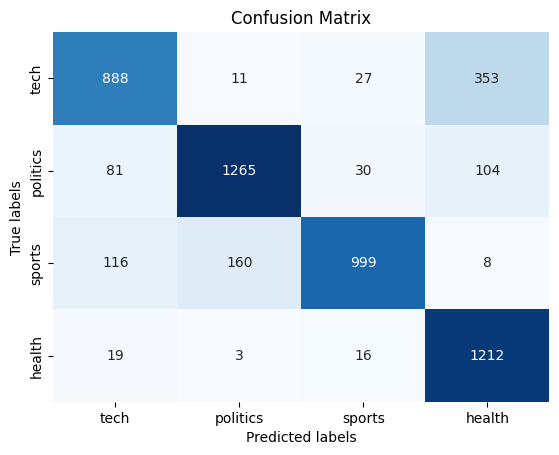

In [ ]:
ax = plt.subplot()
labels = ['tech', 'politics', 'sports', 'health']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels = labels, yticklabels = labels)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()